In [50]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')


# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier,GradientBoostingRegressor
from sklearn.metrics import accuracy_score

# Modelling Helpers
#from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV

#import keras
#from keras import backend as K

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

# loading packages
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs

# machine learning: XGB
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from xgboost.sklearn import XGBRegressor # wrapper
from lightgbm import LGBMRegressor

pd.set_option("display.max_rows", 50)
pd.set_option("display.max_columns",50)

# Configure visualisations
sns.set()
%matplotlib inline
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

## Useful Functions

In [150]:
def fast_loook(data,drop_columns=None,target=None):

    X=data.drop(columns=drop_columns)
    y=data[target]



    x_tr,x_ts,y_tr,y_ts=train_test_split(X,y)

    print(x_tr.shape,y_tr.shape,x_ts.shape,y_ts.shape)

    model=LGBMRegressor(n_estimators=1000,max_depth=5,num_leaves=64)
    model.fit(x_tr,y_tr)

    print(model.score(x_tr,y_tr))
    print(model.score(x_ts,y_ts))

    f_i={}
    for f,n in zip(model.feature_importances_,model.feature_name_):
        f_i[n]=f

    feature_importance=pd.Series(f_i).sort_values(ascending=False)
    print(feature_importance)

    sns.barplot(x=feature_importance.values, y=feature_importance.index, orient='h')
    plt.title("Importance Of Features")
    plt.tight_layout()
    plt.show()

## Data

**Load Data**

In [327]:
train=pd.read_csv("train.csv",parse_dates=True,low_memory=False,index_col="Date")

store=pd.read_csv("store.csv",low_memory=False)

test=pd.read_csv("test.csv",parse_dates=True,low_memory=False,index_col="Date")

In [201]:
train["StateHoliday"].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [25]:
# lEGACY

df=train.copy()

# Descriptive Statistic

## Train Data

### Look Data

In [26]:
train.index

DatetimeIndex(['2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31', '2015-07-31', '2015-07-31',
               '2015-07-31', '2015-07-31',
               ...
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01', '2013-01-01', '2013-01-01',
               '2013-01-01', '2013-01-01'],
              dtype='datetime64[ns]', name='Date', length=1017209, freq=None)

### Gains(0)
- The dataset is from 1 January 2013 to 31 July 2015,i.e. approx. 2.5 yrs.

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Sales          1017209 non-null  int64 
 3   Customers      1017209 non-null  int64 
 4   Open           1017209 non-null  int64 
 5   Promo          1017209 non-null  int64 
 6   StateHoliday   1017209 non-null  object
 7   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 69.8+ MB


In [28]:
# Check unique values
for i in train.columns:
  print(f"Number of unique value  for {i} : {train[i].nunique()}")
  print("-----------------------")

Number of unique value  for Store : 1115
-----------------------
Number of unique value  for DayOfWeek : 7
-----------------------
Number of unique value  for Sales : 21734
-----------------------
Number of unique value  for Customers : 4086
-----------------------
Number of unique value  for Open : 2
-----------------------
Number of unique value  for Promo : 2
-----------------------
Number of unique value  for StateHoliday : 4
-----------------------
Number of unique value  for SchoolHoliday : 2
-----------------------


### Gains (1)
- The dataset is from 1 January 2013 to 31 July 2015,i.e. approx. 2.5 yrs.
- There is no missing value
- DayOfWeek, Open, Promo, SchoolHoliday, StateHoliday are categorical features

In [203]:
train["StateHoliday"].unique()

['0', 'a', 'b', 'c']
Categories (4, object): ['0', 'a', 'b', 'c']

In [204]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 8 columns):
 #   Column         Non-Null Count    Dtype   
---  ------         --------------    -----   
 0   Store          1017209 non-null  int64   
 1   DayOfWeek      1017209 non-null  category
 2   Sales          1017209 non-null  int64   
 3   Customers      1017209 non-null  int64   
 4   Open           1017209 non-null  category
 5   Promo          1017209 non-null  category
 6   StateHoliday   1017209 non-null  category
 7   SchoolHoliday  1017209 non-null  category
dtypes: category(5), int64(3)
memory usage: 35.9 MB


**Short description for features:**
- `Sales`: the turnover for any given day (target variable).
- `Customers`: the number of customers on a given day.
- `Open`: an indicator for whether the store was open: 0 = closed, 1 = open.
- `Promo`: indicates whether a store is running a promo on that day.
- `StateHoliday`: indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. 
- `SchoolHoliday`: indicates if the (Store, Date) was affected by the closure of public schools.

In [205]:
train.describe()

,Store,Sales,Customers
count,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,5.773819e+03,6.331459e+02
std,3.219087e+02,3.849926e+03,4.644117e+02
min,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,3.727000e+03,4.050000e+02
50%,5.580000e+02,5.744000e+03,6.090000e+02
75%,8.380000e+02,7.856000e+03,8.370000e+02
max,1.115000e+03,4.155100e+04,7.388000e+03


### Convert features(P-1)


In [349]:
# convert feature type to categorical
train["DayOfWeek"]=train["DayOfWeek"].astype("category")
train["Open"]=train["Open"].astype("category")
train["Promo"]=train["Open"].astype("category")
train["SchoolHoliday"]=train["SchoolHoliday"].astype("category")
train["StateHoliday"]=train["StateHoliday"].astype("category")

### Adding new features (P-2)

In [206]:
train["Year"]=train.index.year
train["Month"]=train.index.month
train["Day"]=train.index.day
train["WeekOfYear"]=train.index.weekofyear

train["SalesPerCustomer"]=train["Sales"]/train["Customers"]

In [168]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalesPerCustomer
Date,,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31,9.482883
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31,9.702400
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31,10.126675
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31,9.342457
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31,8.626118


In [169]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 844338 entries, 2015-07-31 to 2013-01-01
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   Store             844338 non-null  int64   
 1   DayOfWeek         844338 non-null  category
 2   Sales             844338 non-null  int64   
 3   Customers         844338 non-null  int64   
 4   Open              844338 non-null  category
 5   Promo             844338 non-null  category
 6   StateHoliday      844338 non-null  category
 7   SchoolHoliday     844338 non-null  category
 8   Year              844338 non-null  int64   
 9   Month             844338 non-null  int64   
 10  Day               844338 non-null  int64   
 11  WeekOfYear        844338 non-null  int64   
 12  SalesPerCustomer  844338 non-null  float64 
dtypes: category(5), float64(1), int64(7)
memory usage: 62.0 MB


0.6515814106686209
0.6485189898876003


### Fast look data & ML model result

In [297]:
t_train=train.copy()

# convert some features to categorical
t_train["Store"]=t_train["Store"].astype("category")# that is important
t_train["Month"]=t_train["Month"].astype("category")
t_train["Year"]=t_train["Year"].astype("category")


drop_columns=["Sales","Customers","SalesPerCustomer"]
target="Sales"


(633294, 11) (633294,) (211098, 11) (211098,)
0.9355982253075437
0.9255805420523004
Store               9107
Day                 5749
DayOfWeek           4130
WeekOfYear          3990
Month               3487
Year                2846
SchoolHoliday        609
StateHoliday         293
StateHolidayFlag       1
Promo                  0
Open                   0
dtype: int64


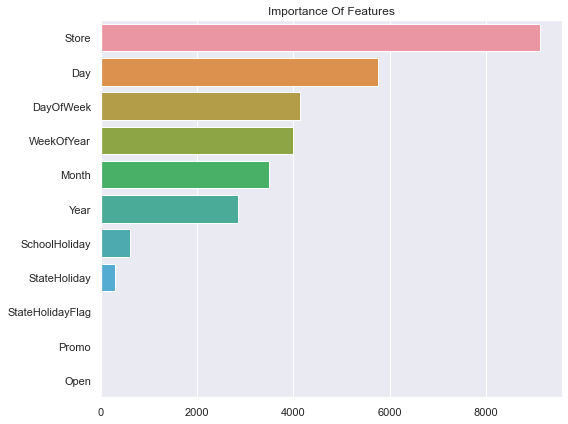

In [299]:
fast_loook(t_train,drop_columns,target)

### Show distributions

In [210]:
# Show data  types
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   Store             1017209 non-null  int64   
 1   DayOfWeek         1017209 non-null  category
 2   Sales             1017209 non-null  int64   
 3   Customers         1017209 non-null  int64   
 4   Open              1017209 non-null  category
 5   Promo             1017209 non-null  category
 6   StateHoliday      1017209 non-null  category
 7   SchoolHoliday     1017209 non-null  category
 8   Year              1017209 non-null  int64   
 9   Month             1017209 non-null  int64   
 10  Day               1017209 non-null  int64   
 11  WeekOfYear        1017209 non-null  int64   
 12  SalesPerCustomer  844340 non-null   float64 
dtypes: category(5), float64(1), int64(7)
memory usage: 74.7 MB


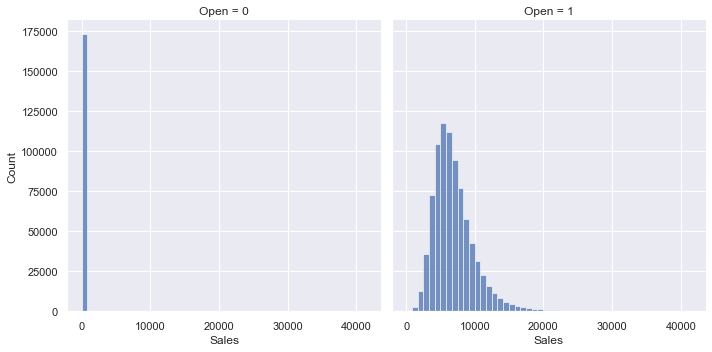

In [211]:
sns.displot(train,x="Sales",bins=50,col="Open");

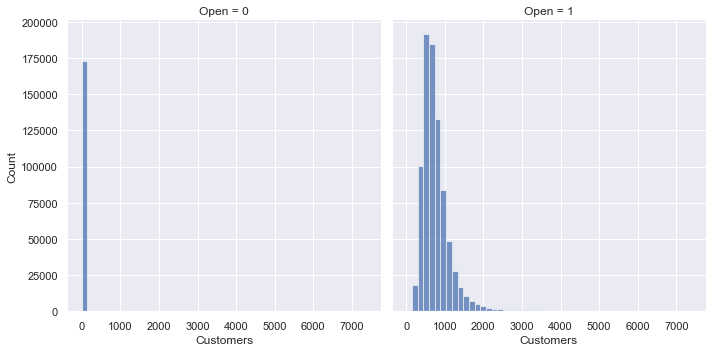

In [212]:
# Customers
sns.displot(train,x="Customers",bins=50,col="Open");

### Gains(2)
- There is no missing value
- DayOfWeek, Open, Promo, SchoolHoliday, StateHoliday are categorical features
- `sales values are zeros when store is closed (it is logical)`
- `Sales and Customers are similar dist.`
- `mean and median values are not same(or almost)`

In [265]:
print(train["Sales"].median(),train["Sales"].mean())
print(train["Customers"].median(),train["Customers"].mean())

5744.0 5773.818972305593
609.0 633.1459464082602


### Categorical Ploting

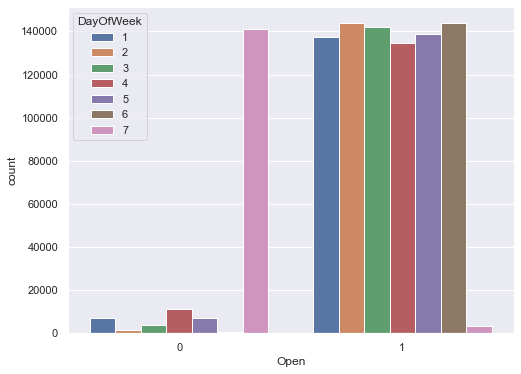

In [213]:
sns.countplot(x='Open',hue='DayOfWeek', data=train)
plt.show()

In [185]:
def plotter(StringA , StringB,df,hue):
  fig, axes = plt.subplots(1,1)
  fig.set_size_inches(15, 10)
  sns.barplot(x=StringA, y=StringB, data=df ,hue=hue);
  #sns.boxplot(x=StringA, y=StringB, data=df ,hue=hue, ax=axes[1])

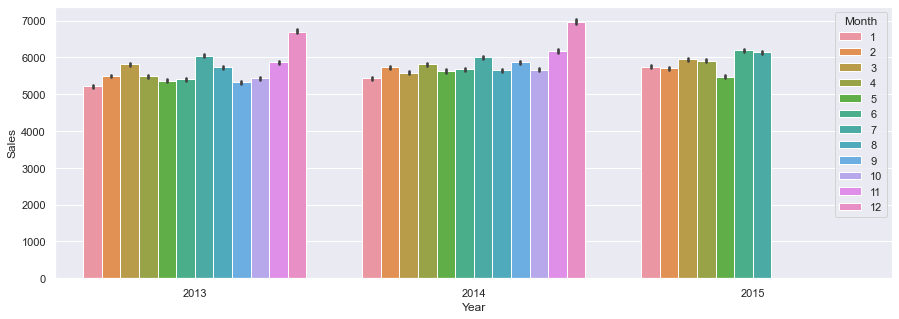

In [216]:
plt.figure(figsize=(15,5))
sns.barplot(x="Year",y="Sales",data=train,hue="Month");

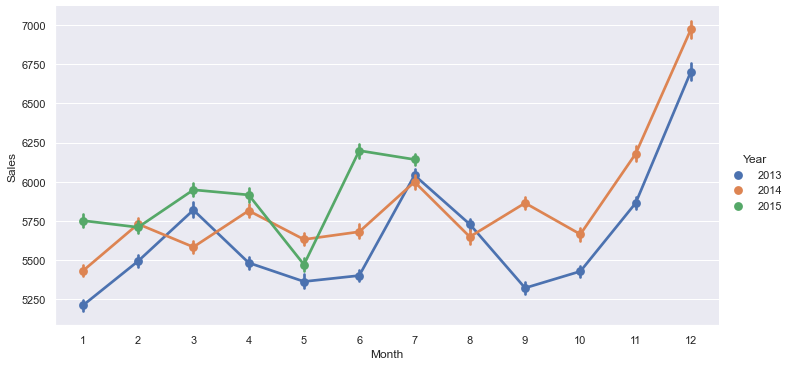

In [279]:
sns.catplot(x="Month",y="Sales",data=train,kind="point",hue="Year",aspect=2)

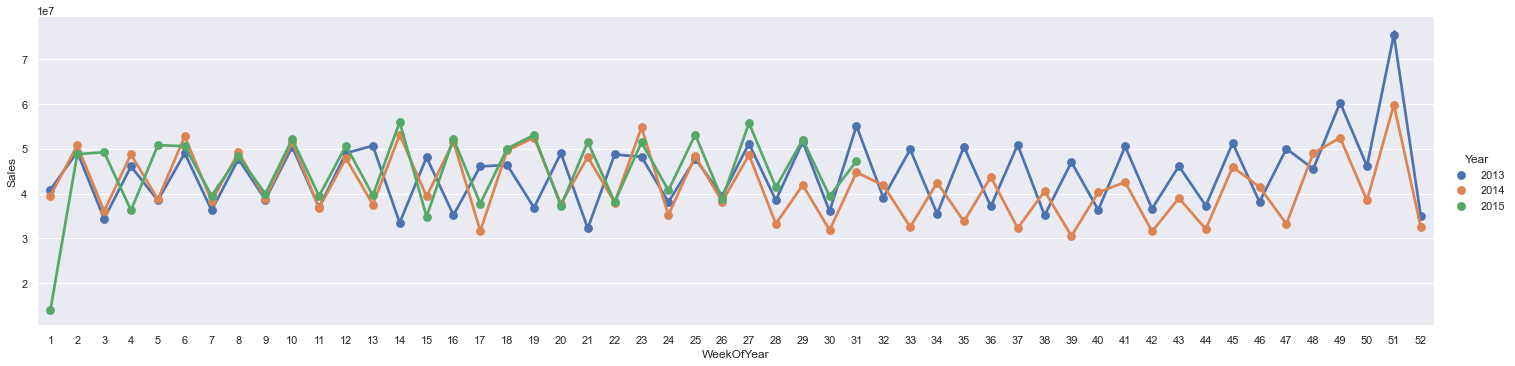

In [306]:
sns.catplot(x="WeekOfYear",y="Sales",data=train[train["Open"]==1],kind="point",hue="Year",aspect=4,estimator=np.sum);

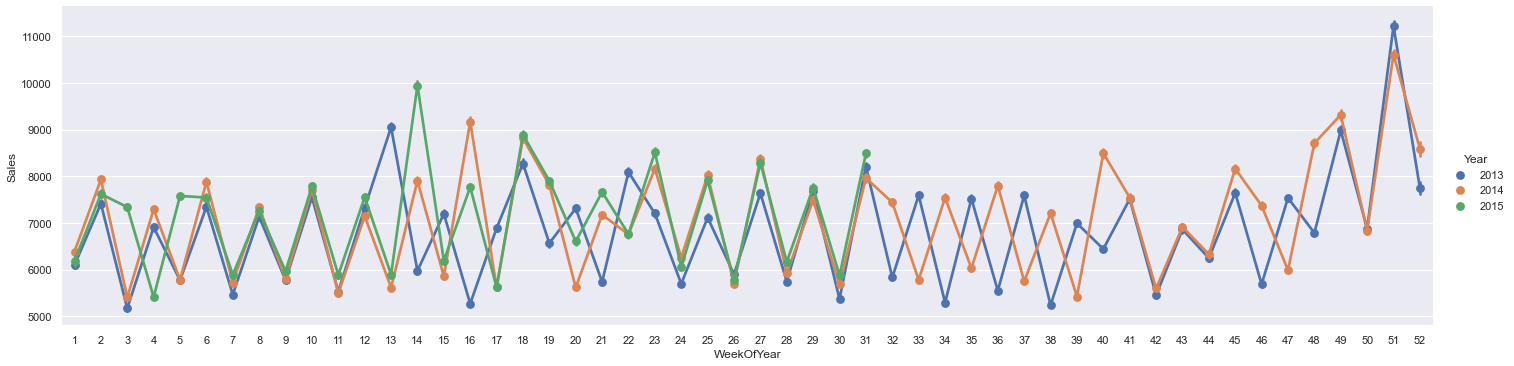

In [296]:
sns.catplot(x="WeekOfYear",y="Sales",data=train[train["Open"]==1],kind="point",hue="Year",aspect=4);

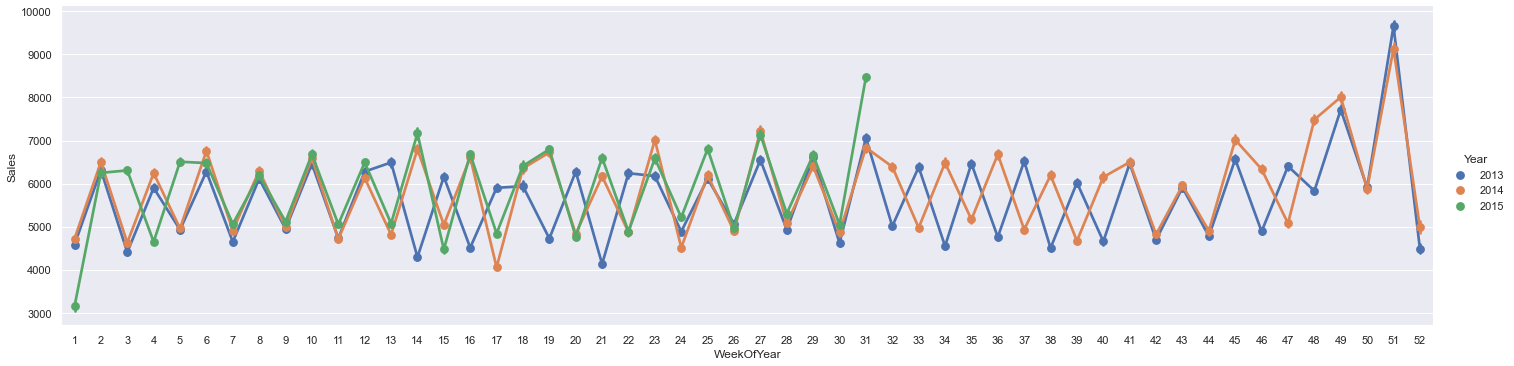

In [301]:
sns.catplot(x="WeekOfYear",y="Sales",data=train,kind="point",hue="Year",aspect=4);

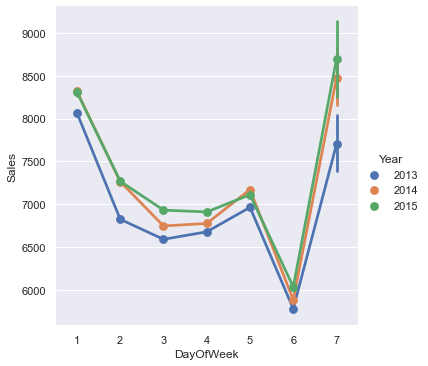

In [295]:
# this is mean value
sns.catplot(x="DayOfWeek",y="Sales",data=train[train["Open"]==1],kind="point",hue="Year")

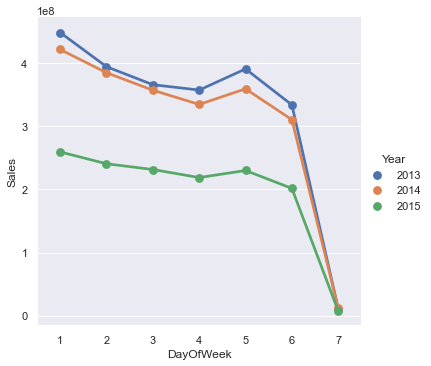

In [308]:
# this is sum value 
sns.catplot(x="DayOfWeek",y="Sales",data=train[train["Open"]==1],kind="point",hue="Year",estimator=np.sum)

I think it is not valid , bacause "2015" have less week

**StateHoliday & Sales**

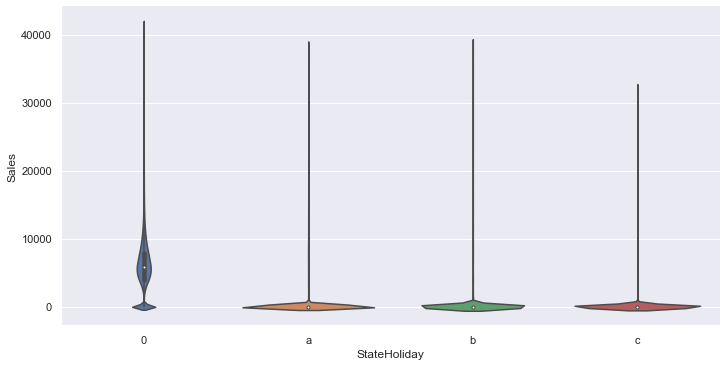

In [255]:
sns.catplot(x="StateHoliday",y="Sales",data=train,kind="violin",aspect=2);

This is not usefull, maybe remove zero values

In [256]:
# remove zero values
no_close=train[train["Open"]==1]

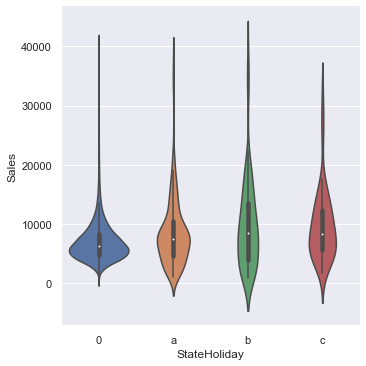

In [257]:
sns.catplot(x="StateHoliday",y="Sales",data=no_close,kind="violin");

**Add SchoolHoliday**

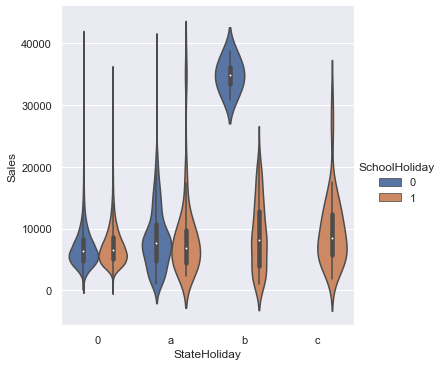

In [258]:
sns.catplot(x="StateHoliday",y="Sales",data=no_close,kind="violin",hue="SchoolHoliday")

In [259]:
no_close["StateHoliday"].value_counts()

0    843482
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [252]:
no_close.groupby("StateHoliday")["SchoolHoliday"].value_counts()

StateHoliday  SchoolHoliday
0             0                680339
              1                163143
a             0                   590
              1                   104
b             1                   139
              0                     6
c             1                    71
Name: SchoolHoliday, dtype: int64

In [269]:
train.groupby("Open")["StateHoliday"].value_counts()

Open  StateHoliday
0     0               142677
      a                19566
      b                 6545
      c                 4029
1     0               843482
      a                  694
      b                  145
      c                   71
Name: StateHoliday, dtype: int64

### Gains(3)
- The dataset is from 1 January 2013 to 31 July 2015,i.e. approx. 2.5 yrs.
- There is no missing value
- DayOfWeek, Open, Promo, SchoolHoliday, StateHoliday are categorical features
- sales values are zeros when store is closed (it is logical)`
- Sales and Customers are similar dist.
- mean and median values are not same(or almost)
- `SchoolHoliday does not have so much effect for 'sales' `
- `StateHoliday have different effects for sales `
- `Sales means are diffrent for each year and month `
- `There is no close store on saturday`
- `There is no open store on sunday`

### Check Sales & Open

In [318]:
#check close stores and their sales
close_tr=train[(train["Open"]==0)&(train["Sales"]==0)]


In [319]:
# Check data consistency

close_tr=train[(train["Open"]==0)]
set(close_tr["Sales"])

{0}

In [320]:
# Sales is zero but store is open

sale_is_zero=train[(train["Sales"]==0)&(train["Open"]==1)]
sale_is_zero

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear,SalesPerCustomer,StateHolidayFlag
Date,,,,,,,,,,,,,,
2015-05-15,971,5,0,0,1,1,0,1,2015,5,15,20,NaN,0
2015-03-26,674,4,0,0,1,1,0,0,2015,3,26,13,NaN,0
2015-02-05,699,4,0,0,1,1,0,0,2015,2,5,6,NaN,0
2014-10-01,708,3,0,0,1,1,0,0,2014,10,1,40,NaN,0
2014-09-22,357,1,0,0,1,1,0,0,2014,9,22,39,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-02-07,259,4,0,0,1,1,0,0,2013,2,7,6,NaN,0
2013-01-31,339,4,0,0,1,1,0,0,2013,1,31,5,NaN,0
2013-01-30,339,3,0,0,1,1,0,0,2013,1,30,5,NaN,0


### Remove closed stores (P-3)

In [321]:
# Closed stores and days which didn't have any sales won't be counted into the forecasts.
train = train[(train["Open"] != 0) & (train['Sales'] != 0)]

print("New train data shape after remove closed stores")
train.shape

New train data shape after remove closed stores


(844338, 14)

### Fast look data & ML model result

(633253, 11) (633253,) (211085, 11) (211085,)
0.9127648874869295
0.9022930488103896
Store               8253
Day                 6471
DayOfWeek           4326
WeekOfYear          3931
Month               3732
Year                2836
SchoolHoliday        624
StateHoliday         228
StateHolidayFlag       0
Promo                  0
Open                   0
dtype: int64


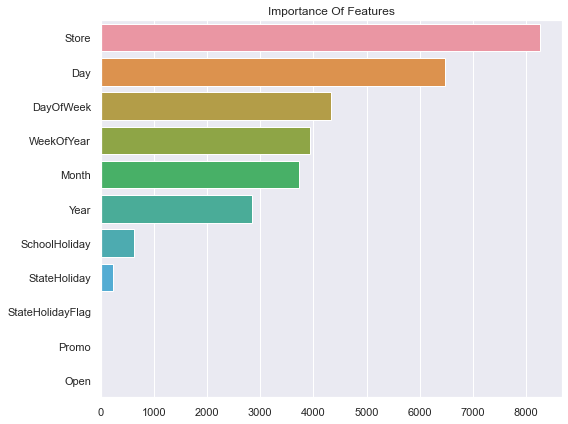

In [322]:
t_train=train[train["Open"]==1].copy()

# convert some features to categorical
t_train["Store"]=t_train["Store"].astype("category")# that is important
t_train["Month"]=t_train["Month"].astype("category")
t_train["Year"]=t_train["Year"].astype("category")


drop_columns=["Sales","Customers","SalesPerCustomer"]
target="Sales"

fast_loook(t_train,drop_columns,target)

### Correlation

In [315]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1017209 entries, 2015-07-31 to 2013-01-01
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype   
---  ------            --------------    -----   
 0   Store             1017209 non-null  int64   
 1   DayOfWeek         1017209 non-null  category
 2   Sales             1017209 non-null  int64   
 3   Customers         1017209 non-null  int64   
 4   Open              1017209 non-null  category
 5   Promo             1017209 non-null  category
 6   StateHoliday      1017209 non-null  category
 7   SchoolHoliday     1017209 non-null  category
 8   Year              1017209 non-null  int64   
 9   Month             1017209 non-null  int64   
 10  Day               1017209 non-null  int64   
 11  WeekOfYear        1017209 non-null  int64   
 12  SalesPerCustomer  844340 non-null   float64 
 13  StateHolidayFlag  1017209 non-null  int64   
dtypes: category(5), float64(1), int64(8)
memory usage: 82.5 MB


<AxesSubplot:>

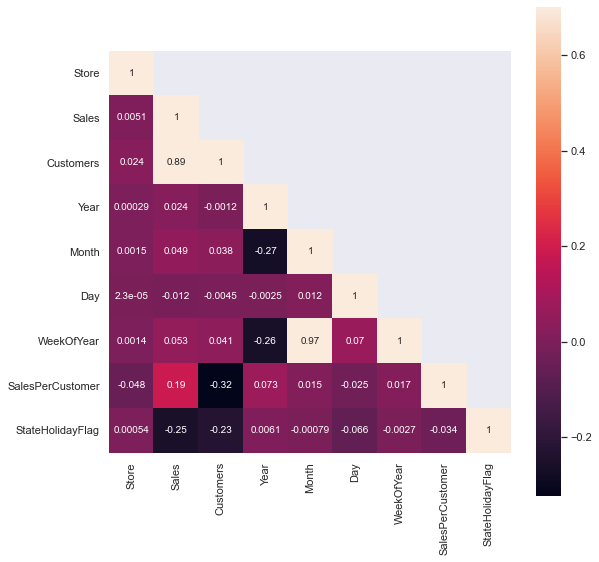

In [314]:
correlation_map = train.corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(9,9)
sns.heatmap(correlation_map, mask=obj,vmax=.7, square=True,annot=True)

Actually, this graph maybe not be logical, some features are not numeric values.

## Store Data

### Look Data

In [331]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [332]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


**Short description for features:**

- Store: a unique Id for each store
- StoreType: differentiates between 4 different store models: a, b, c, d
- Assortment: describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance: distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year]: gives the approximate year and month of the time the nearest competitor was opened
- Promo2: Promo2 is a continuing a promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week]: describes the year and calendar week when the store started participating in Promo2
- PromoInterval: describes the consecutive intervals Promo2 is started, naming the months the promotion is started. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique and Missing Values

In [346]:
# Check unique values
for i in store.columns:
      print(f"Number of unique value  for {i} : {store[i].nunique()}")
      print("-----------------------")

Number of unique value  for Store : 1115
-----------------------
Number of unique value  for StoreType : 4
-----------------------
Number of unique value  for Assortment : 3
-----------------------
Number of unique value  for CompetitionDistance : 654
-----------------------
Number of unique value  for CompetitionOpenSinceMonth : 12
-----------------------
Number of unique value  for CompetitionOpenSinceYear : 23
-----------------------
Number of unique value  for Promo2 : 2
-----------------------
Number of unique value  for Promo2SinceWeek : 24
-----------------------
Number of unique value  for Promo2SinceYear : 7
-----------------------
Number of unique value  for PromoInterval : 3
-----------------------


In [342]:
store["Promo2SinceYear"].unique() 

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [345]:
store["Promo2SinceWeek"].unique() #this time value

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [348]:
# missing value
store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### Gains(4)

- I think some featues have two properties , first is time or distance, second is categorical 